# **1. Load Dataset**

Importing of pandas, matplotlib and seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Inserting the data from Titatnic Dataset

In [ ]:
df = pd.read_csv('tested.csv')

checking the insert dataset

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# **2. Clean data**

Checking the data types , shapes and finding which data have null values

In [ ]:
print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print("\nColumn information:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())


1. DATASET OVERVIEW
------------------------------
Dataset shape: (418, 12)

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

First 5 rows:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894    

Missing data analysis


2. MISSING DATA ANALYSIS
------------------------------
Missing values by column:
       Missing Count  Percentage
Cabin            327   78.229665
Age               86   20.574163
Fare               1    0.239234


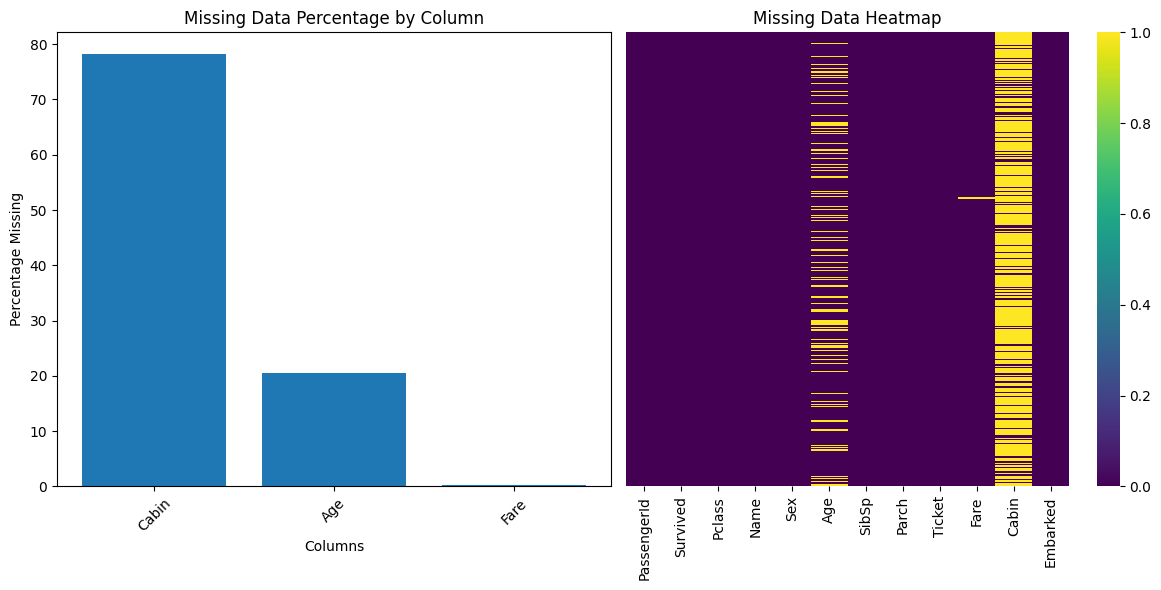

In [ ]:
print("\n2. MISSING DATA ANALYSIS")
print("-" * 30)

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("Missing values by column:")
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing data
plt.figure(figsize=(12, 6))

# Only plot if there are missing values
if len(missing_df[missing_df['Missing Count'] > 0]) > 0:
    plt.subplot(1, 2, 1)
    missing_data_to_plot = missing_df[missing_df['Missing Count'] > 0]
    plt.bar(missing_data_to_plot.index, missing_data_to_plot['Percentage'])
    plt.title('Missing Data Percentage by Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
else:
    plt.subplot(1, 2, 1)
    plt.text(0.5, 0.5, 'No Missing Data', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Missing Data Percentage by Column')

plt.subplot(1, 2, 2)
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()


Handling of missing data



In [ ]:
print("\n3. HANDLING MISSING DATA")
print("-" * 30)

# Drop the 'Cabin' column if it exists
if 'Cabin' in df.columns:
    df = df.drop('Cabin', axis=1)
    print("Dropped 'Cabin' column due to high missing percentage.")
else:
    print("'Cabin' column not found, skipping drop.")


# Impute missing 'Age' values with the median age
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
print(f"Imputed missing 'Age' values with the median ({median_age}).")

# Impute missing 'Fare' value with the median fare
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)
print(f"Imputed missing 'Fare' value with the median ({median_fare}).")

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())


3. HANDLING MISSING DATA
------------------------------
Dropped 'Cabin' column due to high missing percentage.
Imputed missing 'Age' values with the median (27.0).
Imputed missing 'Fare' value with the median (14.4542).

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-103109645.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-103109645.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

# **3. Analysis and Visualisation**

Analysis and visualisation of data by gender , class and age groups

---




4. SURVIVAL ANALYSIS
------------------------------
Overall survival rate: 36.36%

Survival by Gender:
        count  sum  mean
Sex                     
female    152  152   1.0
male      266    0   0.0

Survival by Class:
        count  sum      mean  survival_rate
Pclass                                     
1         107   50  0.467290       0.467290
2          93   30  0.322581       0.322581
3         218   72  0.330275       0.330275


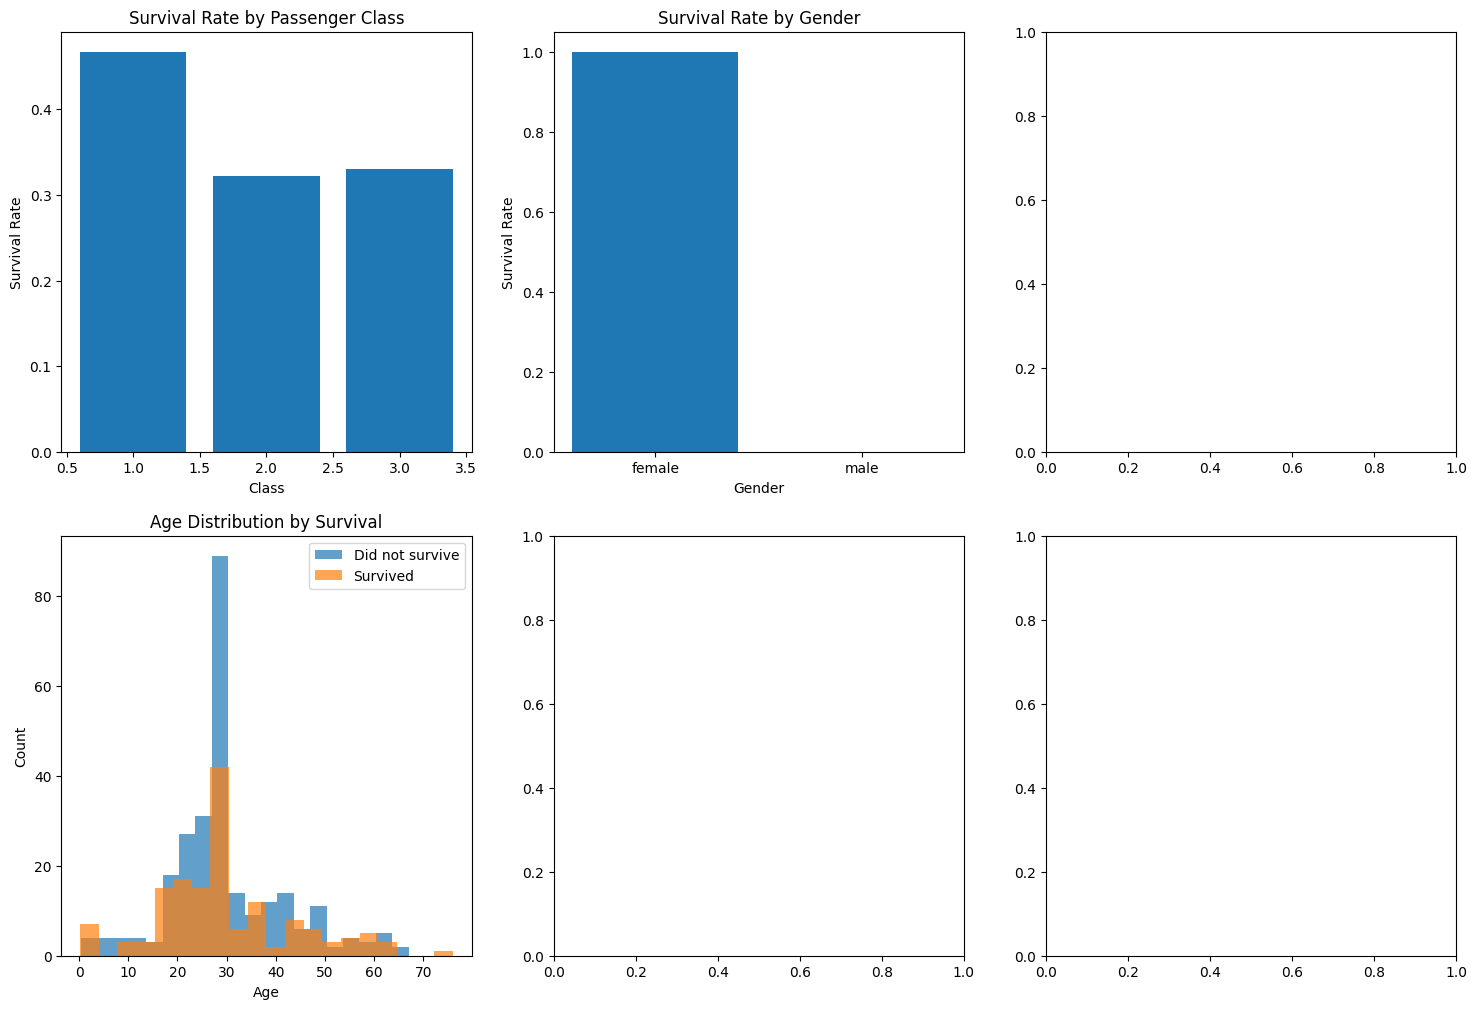

In [ ]:
print("\n4. SURVIVAL ANALYSIS")
print("-" * 30)

survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

# Survival by different categories
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# By Gender
survival_by_gender = df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
print("\nSurvival by Gender:")
print(survival_by_gender)

axes[0, 1].bar(survival_by_gender.index, survival_by_gender['mean'])
axes[0, 1].set_title('Survival Rate by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Survival Rate')

# By Class
survival_by_class = df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
survival_by_class['survival_rate'] = survival_by_class['mean']
print("\nSurvival by Class:")
print(survival_by_class)

axes[0, 0].bar(survival_by_class.index, survival_by_class['survival_rate'])
axes[0, 0].set_title('Survival Rate by Passenger Class')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Survival Rate')

# Age distribution by survival
axes[1, 0].hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, alpha=0.7, label='Did not survive')
axes[1, 0].hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, alpha=0.7, label='Survived')
axes[1, 0].set_title('Age Distribution by Survival')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend()